# Insper - Modelagem e Simulação do Mundo Físico 

## Diagnóstico de programação 1

---

O sistema de equações diferenciais abaixo descreve a dinâmica de um processo industrial de transformação:


$\dfrac{dA(t)}{dt}= 0,3 \cdot A(t) - 0,05 \cdot A(t) \cdot B(t)$

$\dfrac{dB(t)}{dt}= 0,04 \cdot [A(t)]^2 - 0,2 \cdot B(t)$

As variáveis contínuas $A(t)$ e $B(t)$ representam estoques de massa (em $kg$).

---
#### Item 0 (0,0 pontos)

Antes de começar, execute o código abaixo para importar todas as bibliotecas necessárias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

---
#### Item 1 (2,0 pontos)

Implemente uma função (com o nome que quiser) que será utilizada posteriormente pela função `odeint` para resolver esse sistema de equações diferenciais. 

Essa função deve receber:
- Uma **lista** com os valores $A(t)$ e $B(t)$ em um determinado instante de tempo $t$
- O **instante de tempo** $t$

E deve retornar:
- Uma **lista** com as taxas de variação (derivadas) $\dfrac{dA(t)}{dt}$ e $\dfrac{dB(t)}{dt}$ no instante de tempo $t$

In [2]:
# Implemente seu código do Item 1 abaixo

def modelo(x,t):
    A = x[0]
    B = x[1]
    dAdt = 0.3*A-0.05*A*B
    dBdt = 0.04*(A**2)-0.2*B
    dxdt = [dAdt, dBdt]
    return dxdt

---

#### Item 2 (3,0 pontos)

Utilizando a função que você implementou no **Item 1** (**não copie o código novamente** no espaço a seguir), resolva o sistema de equações diferenciais utilizando a função `odeint`.

Para isso:
- Considere como condições iniciais $A(0) = 12$ $kg$ e $B(0) = 8$ $kg$
- Crie uma lista de tempo de $0$ $s$ a $80$ $s$ com $\Delta t=10^{-3}$ $s$

Em seguida, plote em uma **mesma** figura o gráfico de $A(t)$ por $t$ e o gráfico de $B(t)$ por $t$. 

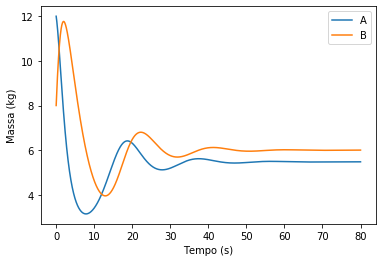

In [3]:
# Implemente seu código do Item 2 abaixo

# Condições iniciais
A_0 = 12
B_0 = 8
x_0 = [A_0,B_0]

# Lista de tempo
dt = 1e-3
t = np.arange(0,80,dt)

# Função odeint
x = odeint(modelo,x_0,t)
A = x[:,0]
B = x[:,1]

# Plota resultados
plt.plot(t,A,label='A')
plt.plot(t,B,label='B')
plt.xlabel('Tempo (s)')
plt.ylabel('Massa (kg)')
plt.legend()
plt.show()

---

#### Item 3 (1,0 ponto)

Nas condições do **Item 2**, qual é o valor mínimo de $B(t)$? Dê sua resposta na forma de um `print`.

In [4]:
# Implemente seu código do Item 3 abaixo

print(min(B))

3.952422176039131


---

#### Item 4 (4,0 pontos)

Utilizando a função que você implementou no **Item 1** e as condições iniciais e lista de tempo do **Item 2** (**não copie os códigos novamente** no espaço a seguir), resolva o sistema de equações diferenciais novamente, porém agora utilizando o **método de Euler**. 

Em seguida, plote em uma **mesma** figura o gráfico de $A(t)$ por $t$ e o gráfico de $B(t)$ por $t$. 

*(Obs: caso você não consiga implementar o método de Euler utilizando a função do **Item 1**, você pode implementá-lo da forma que preferir. Porém, se você não usar a função do **Item 1**, este item valerá 2,0 pontos.)*

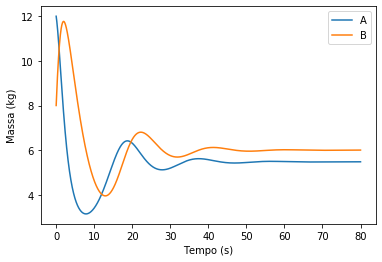

In [5]:
# Implemente seu código do Item 4 abaixo

# Condições iniciais
A_0 = 12
B_0 = 8
A = [A_0]
B = [B_0]

# Lista de tempo
dt = 1e-3
t = np.arange(0,80,dt)

# Método de Euler
for i in range(0, len(t)-1):
    x = [A[i], B[i]]
    dxdt = modelo(x,t[i])
    dAdt = dxdt[0]
    dBdt = dxdt[1]
    A.append(A[i]+dAdt*dt)
    B.append(B[i]+dBdt*dt)
    
# Plota resultados
plt.plot(t,A,label='A')
plt.plot(t,B,label='B')
plt.xlabel('Tempo (s)')
plt.ylabel('Massa (kg)')
plt.legend()
plt.show()